In [1]:
## dataset link https://www.kaggle.com/datasets/durgeshrao9993/world-happiness-dataset

# 导入必要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 加载数据
file_path = 'world_happiness_report.csv'  # 替换为实际文件路径
happiness_data = pd.read_csv(file_path)

# 查看数据基本信息
print(happiness_data.info())

# 查看前5行数据
print(happiness_data.head())

# 检查是否有缺失值
print(happiness_data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1231 non-null   int64  
 1   Country                        617 non-null    object 
 2   Region                         315 non-null    object 
 3   Happiness Rank                 315 non-null    float64
 4   Happiness Score                315 non-null    float64
 5   Standard Error                 158 non-null    float64
 6   Economy (GDP per Capita)       315 non-null    float64
 7   Family                         470 non-null    float64
 8   Health (Life Expectancy)       315 non-null    float64
 9   Freedom                        470 non-null    float64
 10  Trust (Government Corruption)  315 non-null    float64
 11  Generosity                     1084 non-null   float64
 12  Dystopia Residual              315 non-null    f

In [3]:
# 描述性统计
print(happiness_data.describe())

# 检查数据的年份范围和国家数量
print("Years:", happiness_data['year'].unique())
print("Number of Countries:", happiness_data['Country'].nunique())


        Unnamed: 0  Happiness Rank  Happiness Score  Standard Error  \
count  1231.000000      315.000000       315.000000      158.000000   
mean    615.000000       79.238095         5.378949        0.047885   
std     355.503399       45.538922         1.141531        0.017146   
min       0.000000        1.000000         2.839000        0.018480   
25%     307.500000       40.000000         4.510000        0.037268   
50%     615.000000       79.000000         5.286000        0.043940   
75%     922.500000      118.500000         6.269000        0.052300   
max    1230.000000      158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                315.000000  470.000000                315.000000   
mean                   0.899837    0.990347                  0.594054   
std                    0.410780    0.318707                  0.240790   
min                    0.000000    0.000000                  0.00000

In [5]:
# Separate numeric and non-numeric columns
numeric_cols = happiness_data.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = happiness_data.select_dtypes(include=['object']).columns

print("Numeric Columns:", numeric_cols)
print("Non-Numeric Columns:", non_numeric_cols)



Numeric Columns: Index(['Unnamed: 0', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'year'],
      dtype='object')
Non-Numeric Columns: Index(['Country', 'Region'], dtype='object')


In [6]:
# Fill missing values in numeric columns with their mean
happiness_data[numeric_cols] = happiness_data[numeric_cols].fillna(happiness_data[numeric_cols].mean())

# Fill missing values in non-numeric columns with "Unknown"
happiness_data[non_numeric_cols] = happiness_data[non_numeric_cols].fillna("Unknown")

# Verify missing values are handled
print("Missing values after cleaning:")
print(happiness_data.isnull().sum())


Missing values after cleaning:
Unnamed: 0                       0
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
year                             0
dtype: int64


In [7]:
# Summary statistics for numeric columns
print("Descriptive Statistics:")
print(happiness_data[numeric_cols].describe())

# Check the number of unique countries and years (if applicable)
if 'Country' in happiness_data.columns:
    print("Number of unique countries:", happiness_data['Country'].nunique())

if 'Year' in happiness_data.columns:
    print("Year range:", happiness_data['Year'].min(), "-", happiness_data['Year'].max())


Descriptive Statistics:
        Unnamed: 0  Happiness Rank  Happiness Score  Standard Error  \
count  1231.000000     1231.000000      1231.000000     1231.000000   
mean    615.000000       79.238095         5.378949        0.047885   
std     355.503399       23.008856         0.576766        0.006126   
min       0.000000        1.000000         2.839000        0.018480   
25%     307.500000       79.238095         5.378949        0.047885   
50%     615.000000       79.238095         5.378949        0.047885   
75%     922.500000       79.238095         5.378949        0.047885   
max    1230.000000      158.000000         7.587000        0.136930   

       Economy (GDP per Capita)       Family  Health (Life Expectancy)  \
count               1231.000000  1231.000000               1231.000000   
mean                   0.899837     0.990347                  0.594054   
std                    0.207549     0.196800                  0.121661   
min                    0.000000     0.00

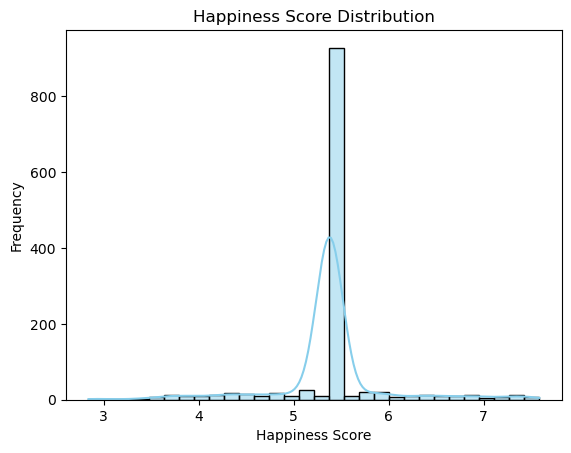

In [9]:
sns.histplot(happiness_data['Happiness Score'], kde=True, bins=30, color='skyblue')
plt.title('Happiness Score Distribution')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()


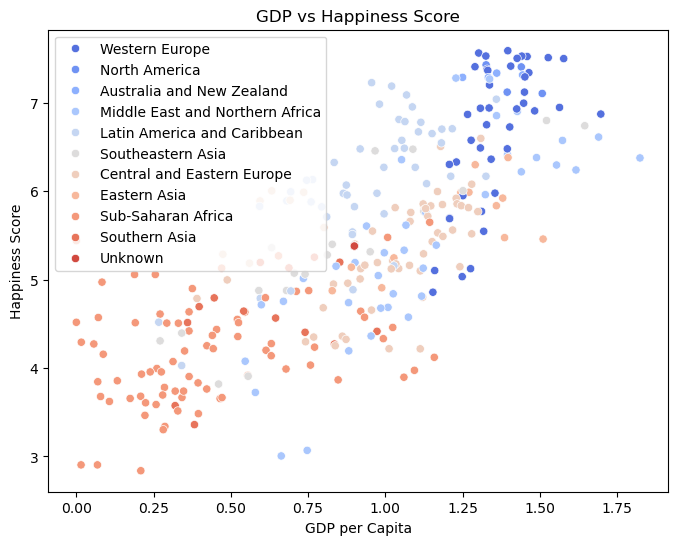

In [13]:
if 'Economy (GDP per Capita)' in happiness_data.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=happiness_data, hue='Region', palette='coolwarm')
    plt.title('GDP vs Happiness Score')
    plt.xlabel('GDP per Capita')
    plt.ylabel('Happiness Score')
    plt.legend(loc='best')
    plt.show()


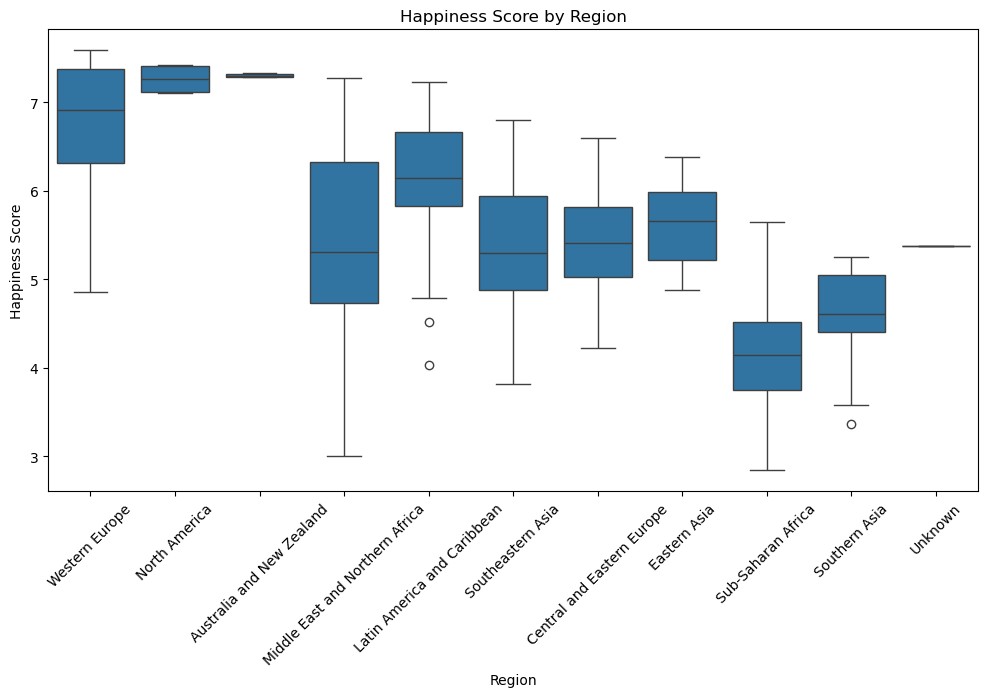

In [14]:
if 'Region' in happiness_data.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Region', y='Happiness Score', data=happiness_data)
    plt.xticks(rotation=45)
    plt.title('Happiness Score by Region')
    plt.xlabel('Region')
    plt.ylabel('Happiness Score')
    plt.show()


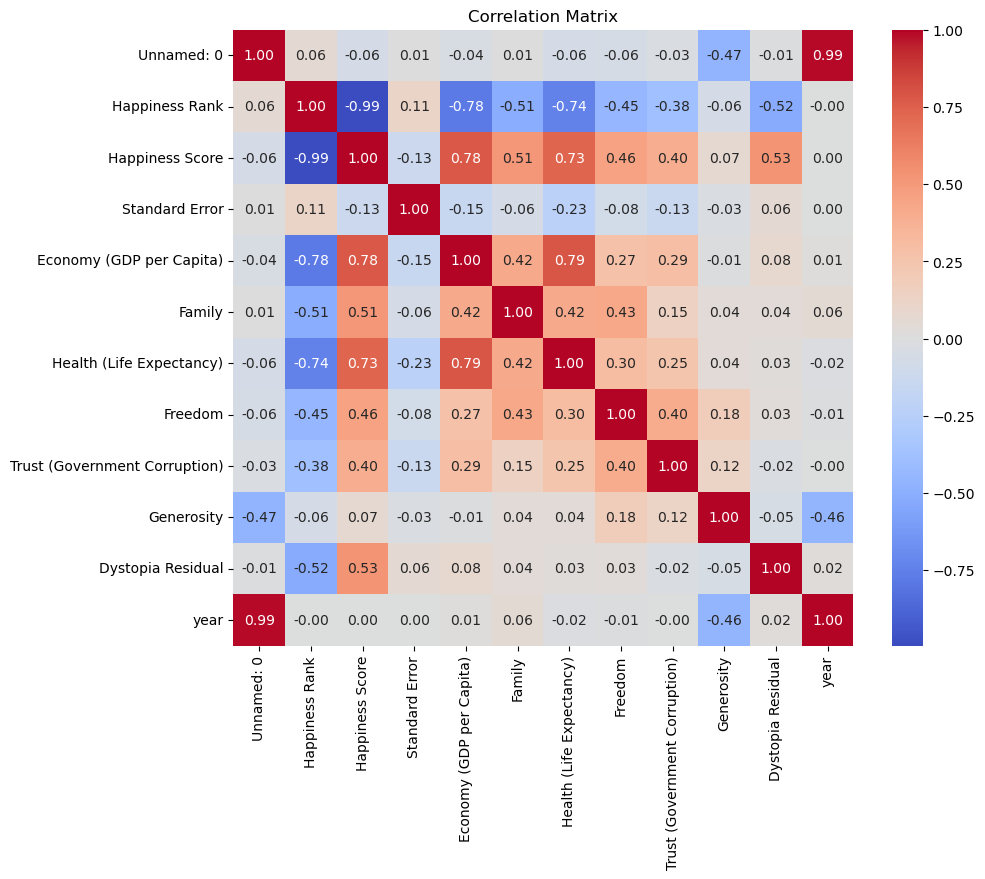

In [15]:
# Calculate correlation matrix for numeric columns
correlation_matrix = happiness_data[numeric_cols].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


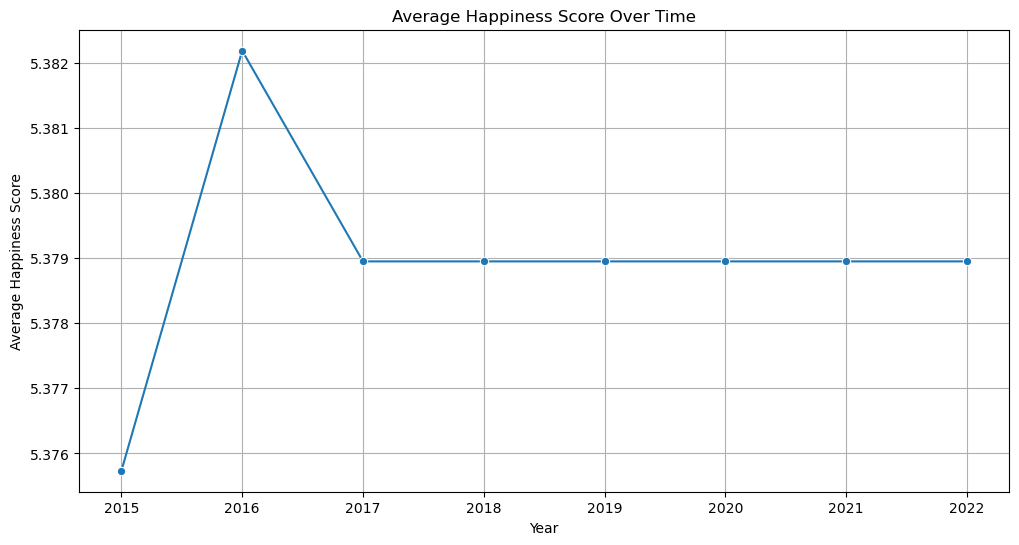

In [18]:
if 'year' in happiness_data.columns:
    avg_happiness_per_year = happiness_data.groupby('year')['Happiness Score'].mean()
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=avg_happiness_per_year.index, y=avg_happiness_per_year.values, marker='o')
    plt.title('Average Happiness Score Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Happiness Score')
    plt.grid(True)
    plt.show()

